# Proyecto práctico: random forest

### Importar librerias

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import OrdinalEncoder

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../data/car_evaluation.csv', header=None)
col_names = ['buying', 'maint', 'doors', 'people', 'lug_boot', 'safety', 'class']
df.columns = col_names
df.head()

,buying,maint,doors,people,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [3]:
# Separamos en X y Y
df_1 = df.copy()
X = df_1.drop(['class'], axis=1)
y = df_1['class']

In [4]:
# 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

## Entrenamiento de modelo de clasificación de carros con random forest

In [5]:
ord_enc = OrdinalEncoder()
X = pd.DataFrame(ord_enc.fit_transform(X), columns=X.columns)
X.head()

,buying,maint,doors,people,lug_boot,safety
0,3.0,3.0,0.0,0.0,2.0,1.0
1,3.0,3.0,0.0,0.0,2.0,2.0
2,3.0,3.0,0.0,0.0,2.0,0.0
3,3.0,3.0,0.0,0.0,1.0,1.0
4,3.0,3.0,0.0,0.0,1.0,2.0


In [6]:
X_train = ord_enc.fit_transform(X_train)
X_test = ord_enc.fit_transform(X_test)

In [7]:
random_forest = RandomForestClassifier(n_estimators=10, random_state=42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [8]:
y_train_pred_rf = random_forest.predict(X_train)
y_test_pred_rf = random_forest.predict(X_test)

## Evaluación de resultados del modelo de clasificación con random forest

In [9]:
# Accuracy en train
train_accuracy = accuracy_score(y_train, y_train_pred_rf)
train_accuracy

0.9983457402812241

In [10]:
# Accuracy en test
test_accuracy = accuracy_score(y_test, y_test_pred_rf )
test_accuracy

0.9383429672447013

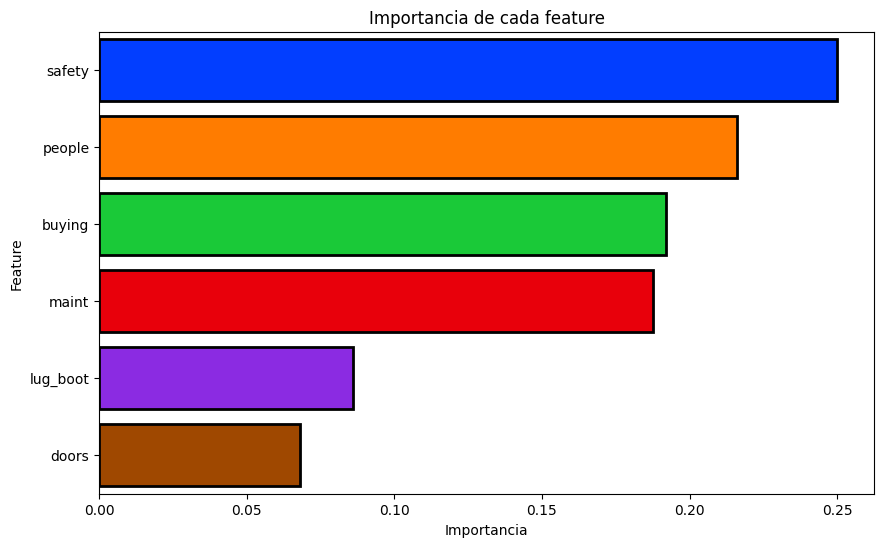

In [11]:
# Verificando el feature importance
importances = random_forest.feature_importances_
columns = X.columns

# Crear un DataFrame con los datos
importance_df = pd.DataFrame({'Column': columns, 'Importance': importances})

# Ordenar por importancia de manera descendente
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Column', data=importance_df, palette='bright', saturation=2.0, edgecolor='black', linewidth=2)

# Título y etiquetas
plt.title('Importancia de cada feature')
plt.xlabel('Importancia')
plt.ylabel('Feature')

# Mostrar el gráfico
plt.show()

In [12]:
cm = confusion_matrix(y_test, y_test_pred_rf)
print(cm) 

[[105   6   6   1]
 [  7  12   0   0]
 [ 11   0 347   0]
 [  1   0   0  23]]


In [13]:
print(classification_report(y_test, y_test_pred_rf))

              precision    recall  f1-score   support

         acc       0.85      0.89      0.87       118
        good       0.67      0.63      0.65        19
       unacc       0.98      0.97      0.98       358
       vgood       0.96      0.96      0.96        24

    accuracy                           0.94       519
   macro avg       0.86      0.86      0.86       519
weighted avg       0.94      0.94      0.94       519

